In [1]:
import jax.numpy as jnp
import jax
import src.models
from experiments.plotting import plot_score_variable_y, plot_score_error_variable_y

import orbax.checkpoint
from src.training import utils
import flax.linen as nn

Setup to load in checkpoint

In [2]:
orbax_checkpointer = orbax.checkpoint.PyTreeCheckpointer()

y_min = -1.0
max_val = 1.0
checkpoint_path = f"/Users/libbybaker/Documents/Python/doobs-score-project/doobs_score_matching/checkpoints/ou/varied_y_{y_min}_to_{max_val}"

restored = orbax_checkpointer.restore(checkpoint_path)
model = src.models.score_mlp.ScoreMLPDistributedEndpt(**restored["network"])
params = restored["params"]

trained_score = utils.trained_score_variable_y(model, params)


In [3]:
from src.data_generate_sde import sde_ornstein_uhlenbeck
from tueplots import bundles
import matplotlib.pyplot as plt

bundle = bundles.neurips2023()
plt.rcParams.update(bundle)

true_score = sde_ornstein_uhlenbeck.score

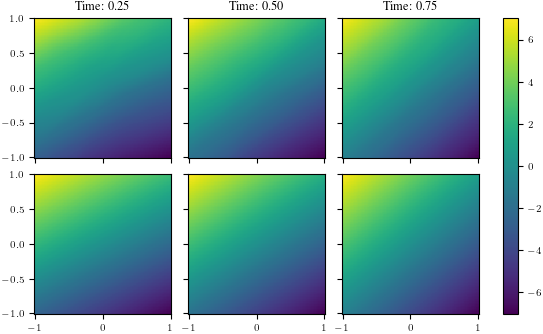

In [4]:
fig, axs = plot_score_variable_y(true_score, trained_score, -1, 1, -1, 1)
plt.savefig('ou_score_varied_y_-1.0_to_1.0.pdf')
plt.show()

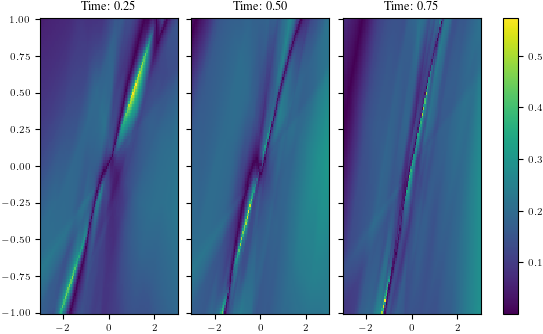

In [5]:
plot_score_error_variable_y(true_score, trained_score, -3, 3, -1, 1)